# CNN-Based SameGame RL Experiment

This notebook implements a Deep Q-Network (DQN) agent using a Convolutional Neural Network to learn optimal SameGame strategies. The CNN architecture is designed to capture spatial patterns in the game board that are crucial for effective tile-clearing decisions.

## Experiment Configuration

Setting up the basic experiment parameters and metadata.

In [8]:
experiment_name = "CNN_simple_reward_base"

## Import Dependencies

Loading all necessary modules for the experiment.

In [9]:
from samegamerl.environments.samegame_env import SameGameEnv
from samegamerl.agents.dqn_agent import DqnAgent
from samegamerl.evaluation.plot_helper import plot_evals, plot_result
from samegamerl.evaluation.benchmark import Benchmark
from tqdm import tqdm
from torch import nn
from samegamerl.game.game_config import GameConfig, GameFactory
from samegamerl.training.train import train
from samegamerl.agents.replay_buffer import ReplayBuffer
from samegamerl.evaluation.benchmark_scripts import _compute_stats, benchmark_agent, get_agent_performance
import matplotlib.pyplot as plt

## Neural Network Architecture

Defining a CNN model that processes the game board as a multi-channel image. The architecture uses:
- Convolutional layers to detect local tile patterns
- Global average pooling to aggregate spatial information
- Fully connected layers for action value estimation

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self, config: GameConfig):
        super().__init__()
        self.config = config
        self.conv_stack = nn.Sequential(
            nn.Conv2d(config.num_colors, 64, 3, padding=1),
            nn.ReLU(),
            # nn.MaxPool2d((2,2), (2,2)),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            # nn.MaxPool2d((2,2), (2,2)),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
        )
        #self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(64*config.num_cols*config.num_rows, 512),
            nn.ReLU(),
            nn.Linear(512, config.action_space_size)
        )

    def forward(self, x):
        x = self.conv_stack(x)
        #x = self.global_pool(x)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

## Hyperparameters

Configuration of training parameters, exploration strategy, and reporting intervals.

In [18]:
# Training specific parameters
batch_size = 512
n_games = 10_000
max_steps = 30  # Maximum steps per episode

# Training intervals
update_target_num = 100    # Target network update frequency
report_num = 500             # Progress reporting interval
visualize_num = 0            # Visualization frequency
initial_update_done = n_games // 2

# Agent hyperparameters
learning_rate = 0.0001
start_epsilon = 1.0           # Initial exploration rate
epsilon_decay = start_epsilon / n_games
final_epsilon = 0.1           # Minimum exploration rate
gamma = 0.95                   # Discount factor
tau = 0.05

## Environment and Agent Setup

Creating the SameGame environment and DQN agent with the CNN model.

In [12]:
# Use medium game configuration (8x8 board with 3 colors)
config = GameFactory.medium()

# Initialize environment and agent
env = SameGameEnv(config, partial_completion_base=5)
agent = DqnAgent(
    model=NeuralNetwork(config),
    config=config,
    model_name=experiment_name,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    gamma=gamma,
    batch_size=batch_size,
)

agent.replay_buffer = ReplayBuffer(capacity=50_000)

Using cuda device


## Load Pre-trained Model (Optional)

Loading a previously trained model to continue training from a checkpoint.

In [6]:
# Uncomment to load a pre-trained model
agent.load()

Model loaded from samegamerl/models/CNN_simple_reward_base.pth


## Training Loop

Execute the main training process using the configured parameters.

In [19]:
training_error = train(
    agent,
    env,
    epochs=n_games,
    max_steps=max_steps,
    report_num=report_num,
    visualize_num=visualize_num,
    update_target_num=update_target_num,
)

# Save the trained model
agent.save()

100%|██████████| 10000/10000 [14:22<00:00, 11.59it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth


100%|██████████| 1000/1000 [00:43<00:00, 22.83it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_091641_317b2431 (ephemeral mode)


Running CNN_simple_reward_base_20251002_091641_317b2431: 100%|██████████| 500/500 [00:21<00:00, 23.10it/s]
100%|██████████| 1000/1000 [00:43<00:00, 23.08it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_091747_8cf9c8e1 (ephemeral mode)


Running CNN_simple_reward_base_20251002_091747_8cf9c8e1: 100%|██████████| 500/500 [00:21<00:00, 22.89it/s]
100%|██████████| 1000/1000 [00:43<00:00, 22.94it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_092000_8a716c29 (ephemeral mode)


Running CNN_simple_reward_base_20251002_092000_8a716c29: 100%|██████████| 500/500 [00:21<00:00, 23.08it/s]
100%|██████████| 1000/1000 [00:44<00:00, 22.72it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_092106_5182b46f (ephemeral mode)


Running CNN_simple_reward_base_20251002_092106_5182b46f: 100%|██████████| 500/500 [00:21<00:00, 23.05it/s]
Running CNN_simple_reward_base_20251002_092318_dd20100b: 100%|██████████| 500/500 [00:21<00:00, 23.15it/s]
100%|██████████| 1000/1000 [00:43<00:00, 23.03it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_092423_7001abf3 (ephemeral mode)


Running CNN_simple_reward_base_20251002_092423_7001abf3: 100%|██████████| 500/500 [00:21<00:00, 23.09it/s]
100%|██████████| 1000/1000 [00:43<00:00, 22.90it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_092529_63a3165f (ephemeral mode)


Running CNN_simple_reward_base_20251002_092529_63a3165f: 100%|██████████| 500/500 [00:21<00:00, 22.92it/s]
100%|██████████| 1000/1000 [00:43<00:00, 22.87it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_092635_a3203a3f (ephemeral mode)


Running CNN_simple_reward_base_20251002_092635_a3203a3f: 100%|██████████| 500/500 [00:21<00:00, 22.90it/s]
100%|██████████| 1000/1000 [00:43<00:00, 23.10it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_092741_ff4f62e0 (ephemeral mode)


Running CNN_simple_reward_base_20251002_092741_ff4f62e0: 100%|██████████| 500/500 [00:21<00:00, 23.20it/s]
100%|██████████| 1000/1000 [00:43<00:00, 23.11it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_092846_4c26197c (ephemeral mode)


Running CNN_simple_reward_base_20251002_092846_4c26197c: 100%|██████████| 500/500 [00:21<00:00, 23.08it/s]
100%|██████████| 1000/1000 [00:43<00:00, 22.82it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_092952_d855e7f5 (ephemeral mode)


Running CNN_simple_reward_base_20251002_092952_d855e7f5: 100%|██████████| 500/500 [00:21<00:00, 22.91it/s]
100%|██████████| 1000/1000 [00:43<00:00, 22.82it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_093205_4470b172 (ephemeral mode)


Running CNN_simple_reward_base_20251002_093205_4470b172: 100%|██████████| 500/500 [00:21<00:00, 23.11it/s]
100%|██████████| 1000/1000 [00:43<00:00, 22.89it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_093311_e1b210c7 (ephemeral mode)


Running CNN_simple_reward_base_20251002_093311_e1b210c7: 100%|██████████| 500/500 [00:21<00:00, 23.04it/s]
100%|██████████| 1000/1000 [00:43<00:00, 22.78it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_093417_a1b2ba06 (ephemeral mode)


Running CNN_simple_reward_base_20251002_093417_a1b2ba06: 100%|██████████| 500/500 [00:21<00:00, 23.16it/s]
Running CNN_simple_reward_base_20251002_093628_57100d47: 100%|██████████| 500/500 [00:21<00:00, 22.96it/s]
100%|██████████| 1000/1000 [00:44<00:00, 22.65it/s]


Model saved to samegamerl/models/CNN_simple_reward_base.pth
Evaluating agent: CNN_simple_reward_base_20251002_093735_f0c15d51 (ephemeral mode)


Running CNN_simple_reward_base_20251002_093735_f0c15d51: 100%|██████████| 500/500 [00:21<00:00, 22.89it/s]


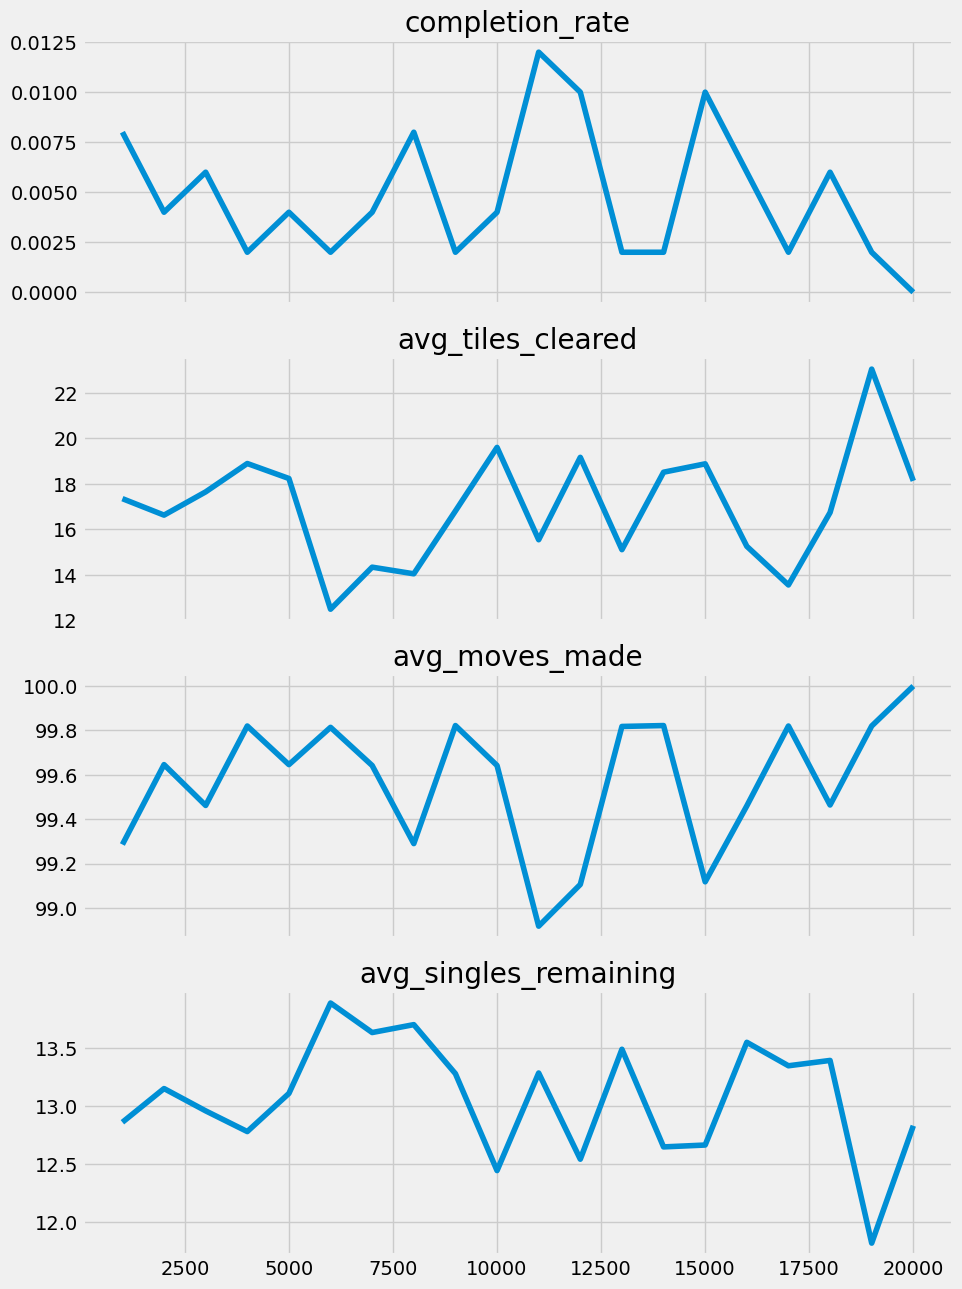

In [11]:
progress = dict()
training_error = []
rounds = 20

for i in range(rounds):
    training_error += train(
        agent,
        env,
        epochs=n_games,
        max_steps=max_steps,
        report_num=report_num,
        visualize_num=visualize_num,
        update_target_num=update_target_num,
    )

    # Save the trained model
    agent.save()

    results = get_agent_performance(agent, config, 500)

    for metric in results:
        if metric not in progress:
            progress[metric] = [results[metric]]
        else:
            progress[metric].append(results[metric])

fig, axs = plt.subplots(4, figsize=(10, 15), sharex=True)
metrics = list(progress.keys())
for i in range(len(metrics)):
    axs[i].plot(list(range(n_games, n_games*(rounds+1), n_games)), progress[metrics[i]])
    axs[i].set_title(metrics[i])


## Training Results Visualization

Plot the training progress to analyze learning performance.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


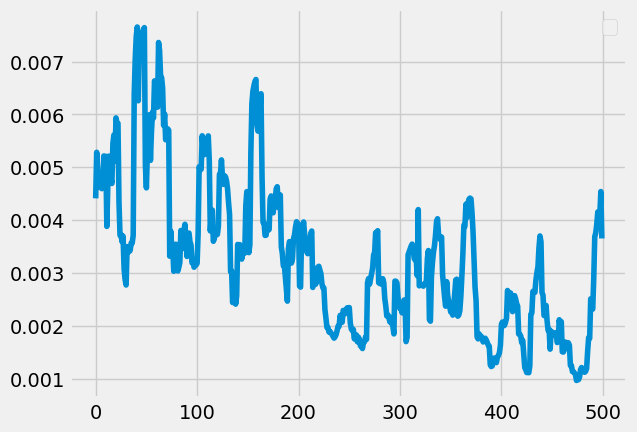

In [17]:
plot_result(training_error, interval=10)

## Agent Evaluation

Evaluate the trained agent's performance on a validation set.

In [17]:
#benchmarker = Benchmark(config, 1000, storage_type='database')
#results = benchmarker.evaluate_agent(agent)
#stats = _compute_stats({agent.model_name: results})
results = get_agent_performance(agent, config, 500)
results = benchmark_agent(agent, config, 1000)

Running benchmark...
Evaluating agent: CNN_simple_reward_base_20251002_082013_9c72d6e1 (ephemeral mode)


Running CNN_simple_reward_base_20251002_082013_9c72d6e1: 100%|██████████| 500/500 [00:21<00:00, 23.22it/s]


Results computed but not saved (ephemeral evaluation)

Performance Results:
------------------------------
   Completion rate: 0.2%
   Avg tiles cleared: 20.5
   Avg moves made: 99.8
   Avg singles remaining: 12.5

Evaluating Custom Agent
Games: 1000

Running built-in bots...
RandomBot: Using existing results for all 1000 games
LargestGroupBot: Using existing results for all 1000 games
GreedySinglesBot: Using existing results for all 1000 games
Running agent...
Evaluating agent: CNN_simple_reward_base_20251002_082036_9c72d6e1 (ephemeral mode)


Running CNN_simple_reward_base_20251002_082036_9c72d6e1: 100%|██████████| 1000/1000 [00:45<00:00, 22.15it/s]


Results computed but not saved (ephemeral evaluation)

Performance Results:
------------------------------
1. GreedySinglesBot
   Completion rate: 46.2%
   Avg tiles cleared: 62.9
   Avg moves made: 12.7
   Avg singles remaining: 1.1

2. RandomBot
   Completion rate: 15.2%
   Avg tiles cleared: 61.1
   Avg moves made: 13.6
   Avg singles remaining: 2.9

3. LargestGroupBot
   Completion rate: 14.3%
   Avg tiles cleared: 61.0
   Avg moves made: 11.7
   Avg singles remaining: 3.0

4. CNN_simple_reward_base
   Completion rate: 0.3%
   Avg tiles cleared: 19.8
   Avg moves made: 99.7
   Avg singles remaining: 12.7



## Interactive Game Visualization (Optional)

Watch the trained agent play the game interactively.